In [1]:
# Introduction to Statistical Learning
# Chapter 2
# Dataset: Auto.csv 

`Loading data'`

In [2]:
import pandas as pd
df = pd.read_csv('Auto.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
df.horsepower

0      130
1      165
2      150
3      150
4      140
      ... 
392     86
393     52
394     84
395     79
396     82
Name: horsepower, Length: 397, dtype: object

In [4]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [5]:
df = pd.read_csv('Auto.csv', na_values=['?'])

In [6]:
df.horsepower.sum()

40952.0

In [7]:
df.shape

(397, 9)

`Basic data exploration`

In [8]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [9]:
df.set_index('name', inplace=True)

In [10]:
df.loc['ford galaxie 500',['weight','horsepower']]

,weight,horsepower
name,,
ford galaxie 500,4341,198.0
ford galaxie 500,4154,153.0
ford galaxie 500,4129,153.0


In [11]:
df.loc[lambda df: (df.year > 80) & (df.mpg > 30), ['weight','origin','year','mpg']].head(10)

,weight,origin,year,mpg
name,,,,
toyota starlet,1755,3,81,39.1
plymouth champ,1875,1,81,39.0
honda civic 1300,1760,3,81,35.1
subaru,2065,3,81,32.3
datsun 210 mpg,1975,3,81,37.0
toyota tercel,2050,3,81,37.7
mazda glc 4,1985,3,81,34.1
plymouth horizon 4,2215,1,81,34.7
ford escort 4w,2045,1,81,34.4


In [12]:
df.loc[lambda df: (df.displacement < 300)
        & (df.index.str.contains('ford') | df.index.str.contains('datsun')),
        ['displacement', 'weight', 'origin']].head(10)

,displacement,weight,origin
name,,,
ford maverick,200.0,2587,1
datsun pl510,97.0,2130,3
datsun pl510,97.0,2130,3
ford pinto,98.0,2046,1
ford torino 500,250.0,3302,1
ford mustang,250.0,3139,1
datsun 1200,72.0,1613,3
ford pinto runabout,122.0,2226,1
ford pinto (sw),122.0,2395,1


`Graphical summaries`

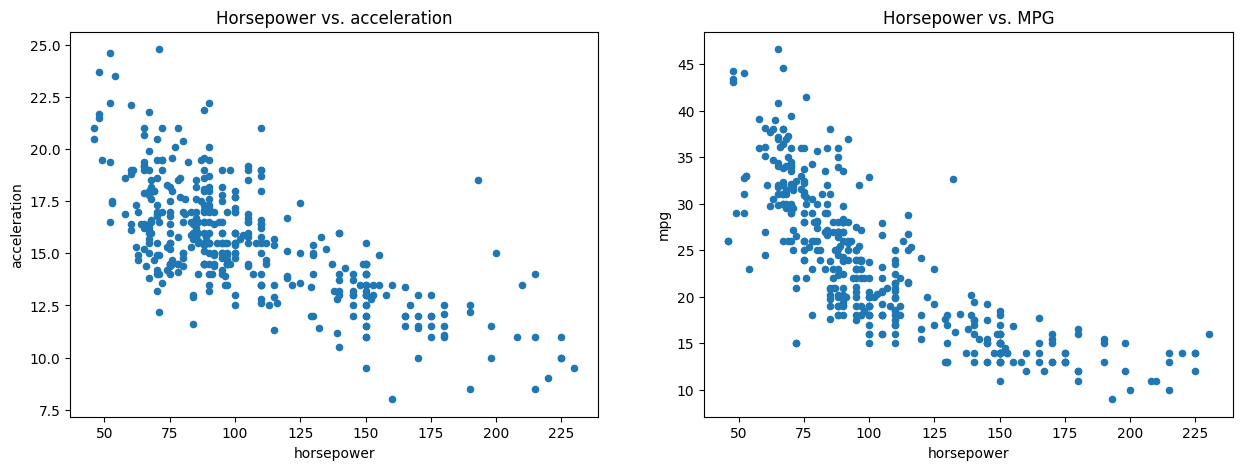

In [13]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
df.plot.scatter('horsepower', 'mpg', ax=axes[1]);
df.plot.scatter('horsepower','acceleration', ax=axes[0])
axes[1].set_title('Horsepower vs. MPG');
axes[0].set_title('Horsepower vs. acceleration');

In [14]:
df.cylinders = pd.Series(df.cylinders, dtype='category')

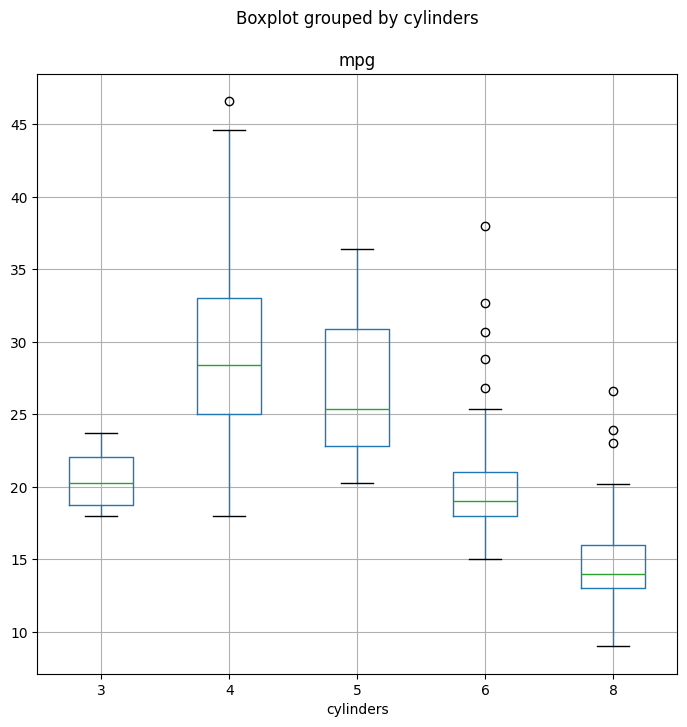

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
df.boxplot('mpg', by='cylinders', ax=ax);

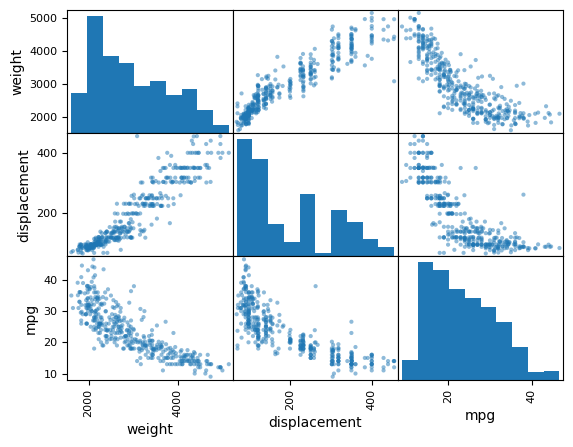

In [16]:
pd.plotting.scatter_matrix(df[['weight','displacement','mpg']]);